**Описание датасета**

Для выполнения лабораторной работы выбран [набор данных](https://www.kaggle.com/datasets/ardaorcun/turkey-6-february-disaster-and-related-datas?resource=download&select=Earthquakes.csv), содержащий информацию о землетрясении в Турции в феврале 2023. В датасете представлена информация о подземных толчках, точное время, координаты, глубина, магнитуда и прочее.

**Описание атрибутов предоставленных данных**

МАГНИТУДА ЗЕМЛЕТРЯСЕНИЯ (М, от латинского magnitudo - величина) - количественная характеристика величины очага землетрясения. Определяется по записям землетрясений (сейсмограммам) на сейсмических станциях. Это безразмерная характеристика, позволяющая сравнивать источники (очаги) землетрясений по их величине, силе. Для определения магнитуды использовался логарифм измеренной на сейсмограмме амплитуды, которая затем приводилась к стандартному расстоянию. К настоящему времени в мире имеется множество различных шкал магнитуд, различающихся способом определения магнитуд. Это локальная магнитуда (ML), магнитуда по поверхностным (MS) и по объемным волнам (mb, mpv), по сейсмическому моменту (MW).

1.   Date         (Дата) - формат Дата Время
2.   Longitude   (Долгота) - вещественное число
3.   Latitude     (Широта) - вещественное число
4.   Depth        (Глубина подземного толчка) - вещественное число
5.   Root mean square ()          - вещественное число
6.   Type         (Тип шкалы магнитуды) - строковый формат
7.   Magnitude    (Магнитуда) - вещественное число
8.   Location     (Название местоположения) - строковый формат

**Описание задачи для анализа**

Задачей анализа данного набора данных является определение наиболее пострадавших регионов, определение точного расположения подземных толчков для сравнения с прошлыми землетрясениями и прогноза будущих очагов.

**Вычисление среднего значения и СКО**

In [ ]:
import pandas

df = pandas.read_csv('Earthquakes.csv')
numeric_columns = ['Longitude', 'Latitude', 'Depth', 'Rms', 'Magnitude']
results = []
for column in numeric_columns:
    results.append([column, df[column].mean(), df[column].std()])
pandas.DataFrame(results, columns=["Атрибута", 'Среднее значение', "СКО"])


,Атрибута,Среднее значение,СКО
0,Longitude,37.473933,1.216845
1,Latitude,37.810726,0.726524
2,Depth,7.684039,2.404630
3,Rms,0.443839,0.256377
4,Magnitude,2.265606,0.782173


**Построение гистограммы, определение наличия выбросов**

Выброс – это наблюдение, удаленное от других в выборке. Другими словами, это Наблюдение, которое расходится с общей закономерностью выборки.

На графиках наглядно можно определить выброс по наличию столбцов отдельно стоящих от основной группы.

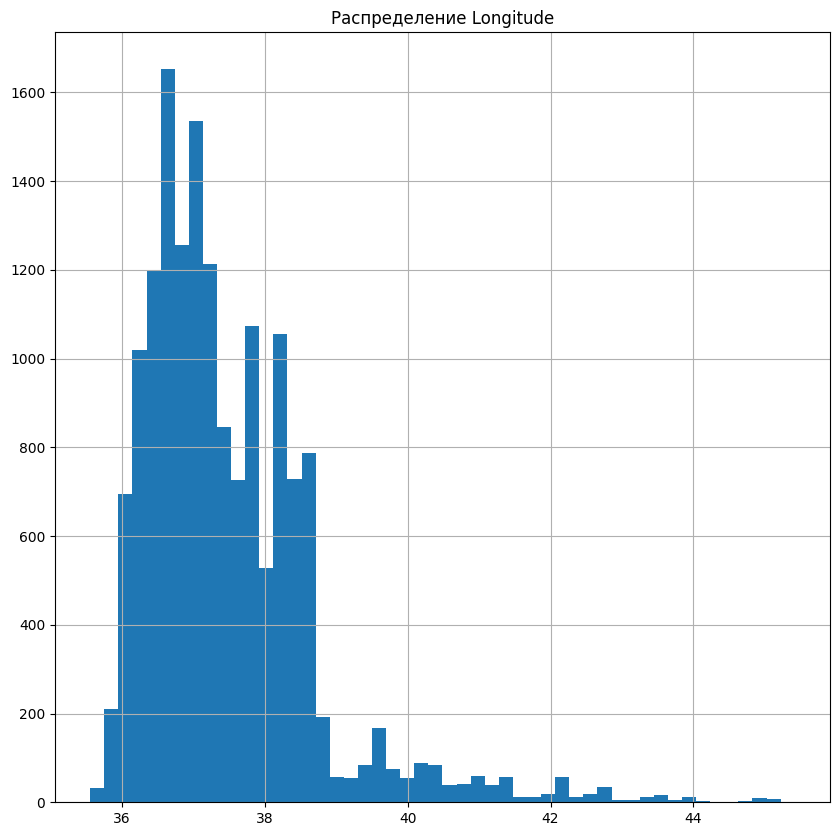

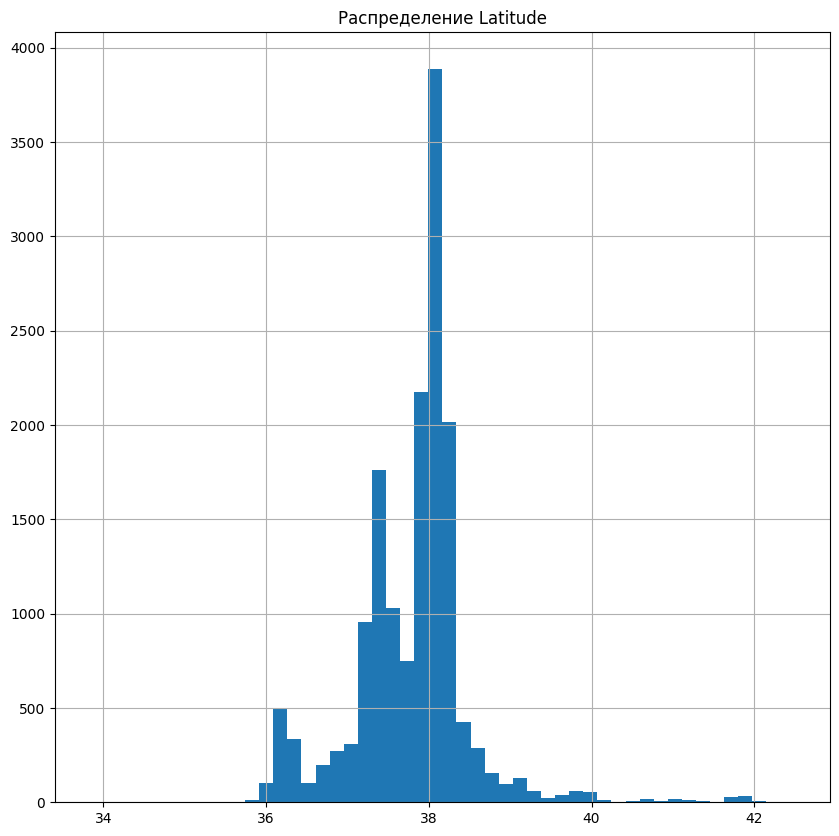

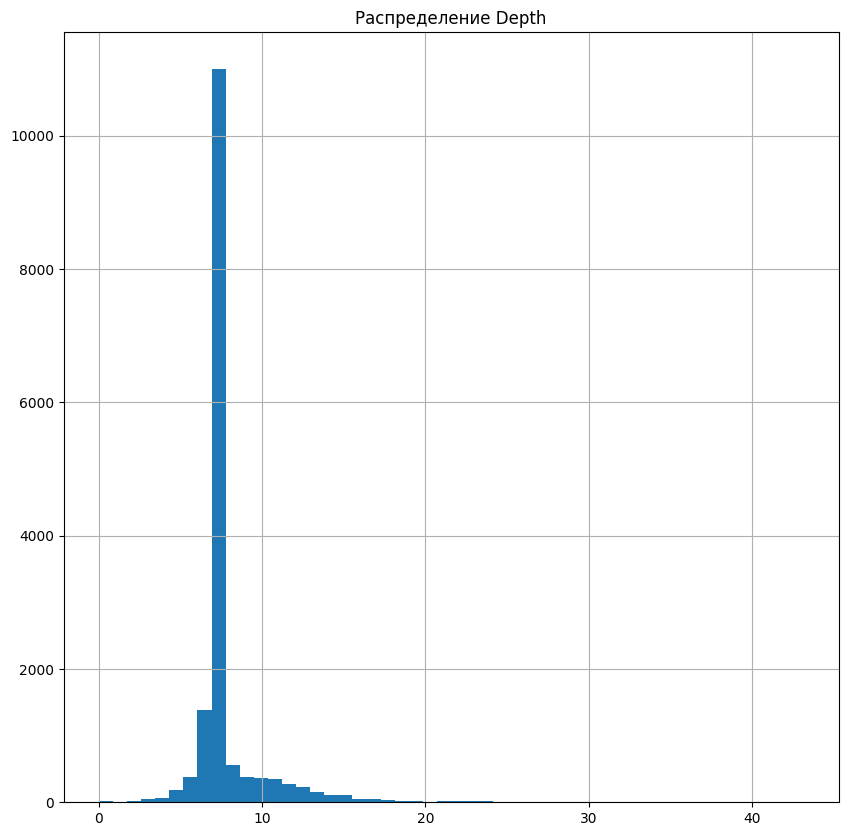

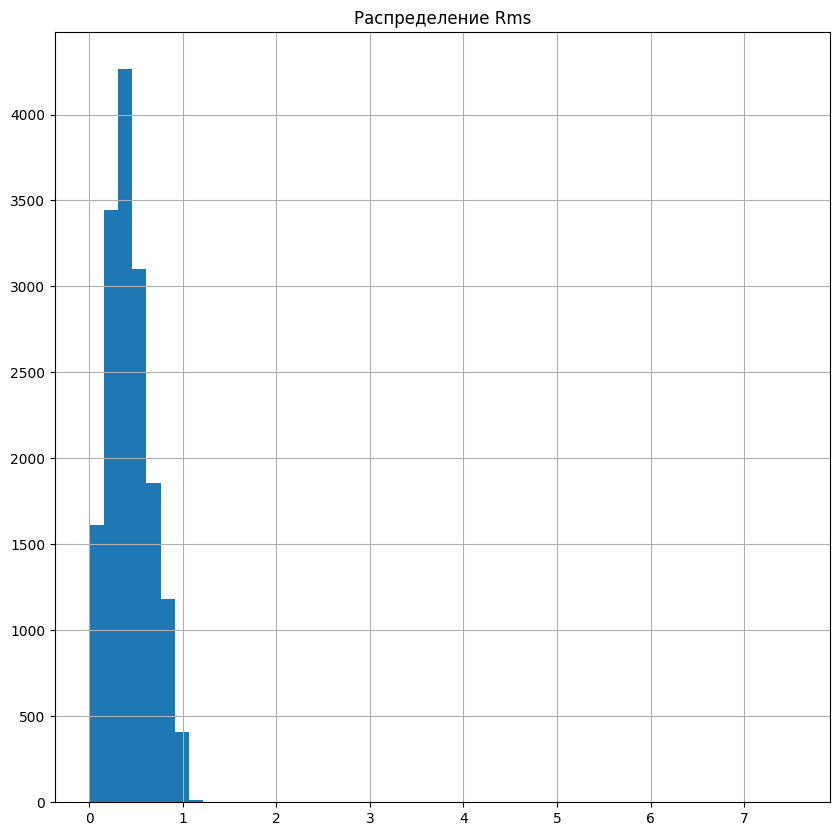

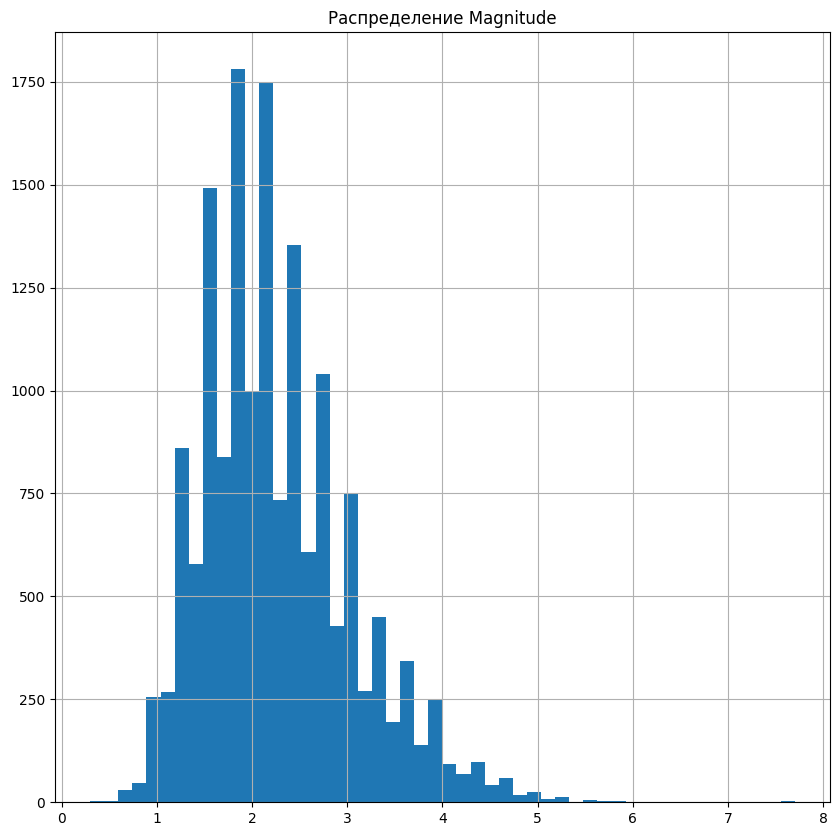

In [ ]:
import pandas


def draw_hist(column_name, figsize=(10, 10), bins=50, is_grid_enabled=True):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.hist(df_auto[column_name], bins=bins)
    plt.grid(is_grid_enabled)
    plt.title(f"Распределение {column_name}")


df = pandas.read_csv('Earthquakes.csv')
numeric_columns = ['Longitude', 'Latitude', 'Depth', 'Rms', 'Magnitude']
for column in numeric_columns:
    draw_hist(column)

**Поиск пропущенных значений**

В данном датасете отсутствуют пропуски. В результате выполнения кода ниже при отсутствии значения удаляется вся колонка. У нас все колонки остались на месте.


In [ ]:
import pandas

df = pandas.read_csv('Earthquakes.csv')
df.dropna(axis='columns')


,Unnamed: 0,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID
0,0,2023-02-06 01:17:32,37.043,37.288,8.60,1.92,MW,7.7,Pazarcık (Kahramanmaraş),543428
1,1,2023-02-06 10:24:47,37.239,38.089,7.00,0.58,MW,7.6,Elbistan (Kahramanmaraş),543593
2,2,2023-02-06 01:28:16,36.920,37.304,6.20,0.21,MW,6.6,Nurdağı (Gaziantep),543431
3,3,2023-02-20 17:04:27,36.021,36.037,21.73,0.94,MW,6.4,Yayladağı (Hatay),551067
4,4,2023-02-06 12:02:11,36.478,38.071,17.04,0.93,MW,5.9,Göksun (Kahramanmaraş),543617
...,...,...,...,...,...,...,...,...,...,...
15896,15896,2023-02-25 20:58:32,36.888,37.341,8.82,0.21,ML,0.5,Türkoğlu (Kahramanmaraş),555800
15897,15897,2023-02-24 15:23:28,37.053,37.383,6.90,0.17,ML,0.5,Dulkadiroğlu (Kahramanmaraş),553677
15898,15898,2023-03-03 16:32:10,38.556,38.190,7.00,0.16,ML,0.5,Battalgazi (Malatya),558960
15899,15899,2023-03-04 01:51:53,36.928,37.377,6.95,0.05,ML,0.3,Türkoğlu (Kahramanmaraş),559056




---



** Определение корелляции между параметрами **

Корреляция (от лат. correlatio), корреляционная зависимость — взаимозависимость двух или нескольких случайных величин. Суть ее заключается в том, что при изменении значения одной переменной происходит закономерное изменение (уменьшению или увеличению) другой(-их) переменной(-ых).

Виды корреляционной связи между измеренными переменными могут быть различны: так корреляция бывает линейной и нелинейной, положительной и отрицательной. Она линейна, если с увеличением или уменьшением одной переменной, вторая переменная также растёт, либо убывает. Она нелинейна, если при увеличении одной величины характер изменения второй не линеен, а описывается другими законами (полиномиальная, гиперболическая).

Если повышение уровня одной переменной сопровождается повышением уровня другой, то речь идет о положительной корреляции. 

Если рост уровня одной переменной сопровождается снижением уровня другой, то мы имеем дело с отрицательной корреляцией.


Интерпретация показателя корреляции:
1.   Высокая степень взаимосвязи – значения коэффициента корреляции находится в пределах от 0,7 до 0,99;
2.   Средняя степень взаимосвязи – значения коэффициента корреляции находится в пределах от 0,5 до 0,69;
3.   Слабая степень взаимосвязи – значения коэффициента корреляции находится от 0,2 до 0,49.

Проанализировав таблицу видим, что высокая положительная корреляция между широтой (latitude) и долготой (longitude), между широтой и Rms. Низкая положительная корреляция между широтой и глубиной, долготой и глубиной, магнитудой и глубиной. Отрицательная низкая корреляция между мегнитудой и долготой, магнитудой и широтой, глубиной и Rms

In [ ]:
import pandas

df = pandas.read_csv('Earthquakes.csv')
df.drop(['Unnamed: 0', 'Date', 'Type', 'Location', 'EventID'], inplace=True, axis=1)

df.corr()

,Longitude,Latitude,Depth,Rms,Magnitude
Longitude,1.000000,0.714690,0.036995,-0.048957,-0.125908
Latitude,0.714690,1.000000,0.013182,0.074433,-0.061304
Depth,0.036995,0.013182,1.000000,-0.004191,0.093667
Rms,-0.048957,0.074433,-0.004191,1.000000,0.157562
Magnitude,-0.125908,-0.061304,0.093667,0.157562,1.000000


**Построение графиков рассеяния**

array([[<Axes: xlabel='Longitude', ylabel='Longitude'>,
        <Axes: xlabel='Latitude', ylabel='Longitude'>,
        <Axes: xlabel='Depth', ylabel='Longitude'>,
        <Axes: xlabel='Rms', ylabel='Longitude'>,
        <Axes: xlabel='Magnitude', ylabel='Longitude'>],
       [<Axes: xlabel='Longitude', ylabel='Latitude'>,
        <Axes: xlabel='Latitude', ylabel='Latitude'>,
        <Axes: xlabel='Depth', ylabel='Latitude'>,
        <Axes: xlabel='Rms', ylabel='Latitude'>,
        <Axes: xlabel='Magnitude', ylabel='Latitude'>],
       [<Axes: xlabel='Longitude', ylabel='Depth'>,
        <Axes: xlabel='Latitude', ylabel='Depth'>,
        <Axes: xlabel='Depth', ylabel='Depth'>,
        <Axes: xlabel='Rms', ylabel='Depth'>,
        <Axes: xlabel='Magnitude', ylabel='Depth'>],
       [<Axes: xlabel='Longitude', ylabel='Rms'>,
        <Axes: xlabel='Latitude', ylabel='Rms'>,
        <Axes: xlabel='Depth', ylabel='Rms'>,
        <Axes: xlabel='Rms', ylabel='Rms'>,
        <Axes: xlabel='Mag

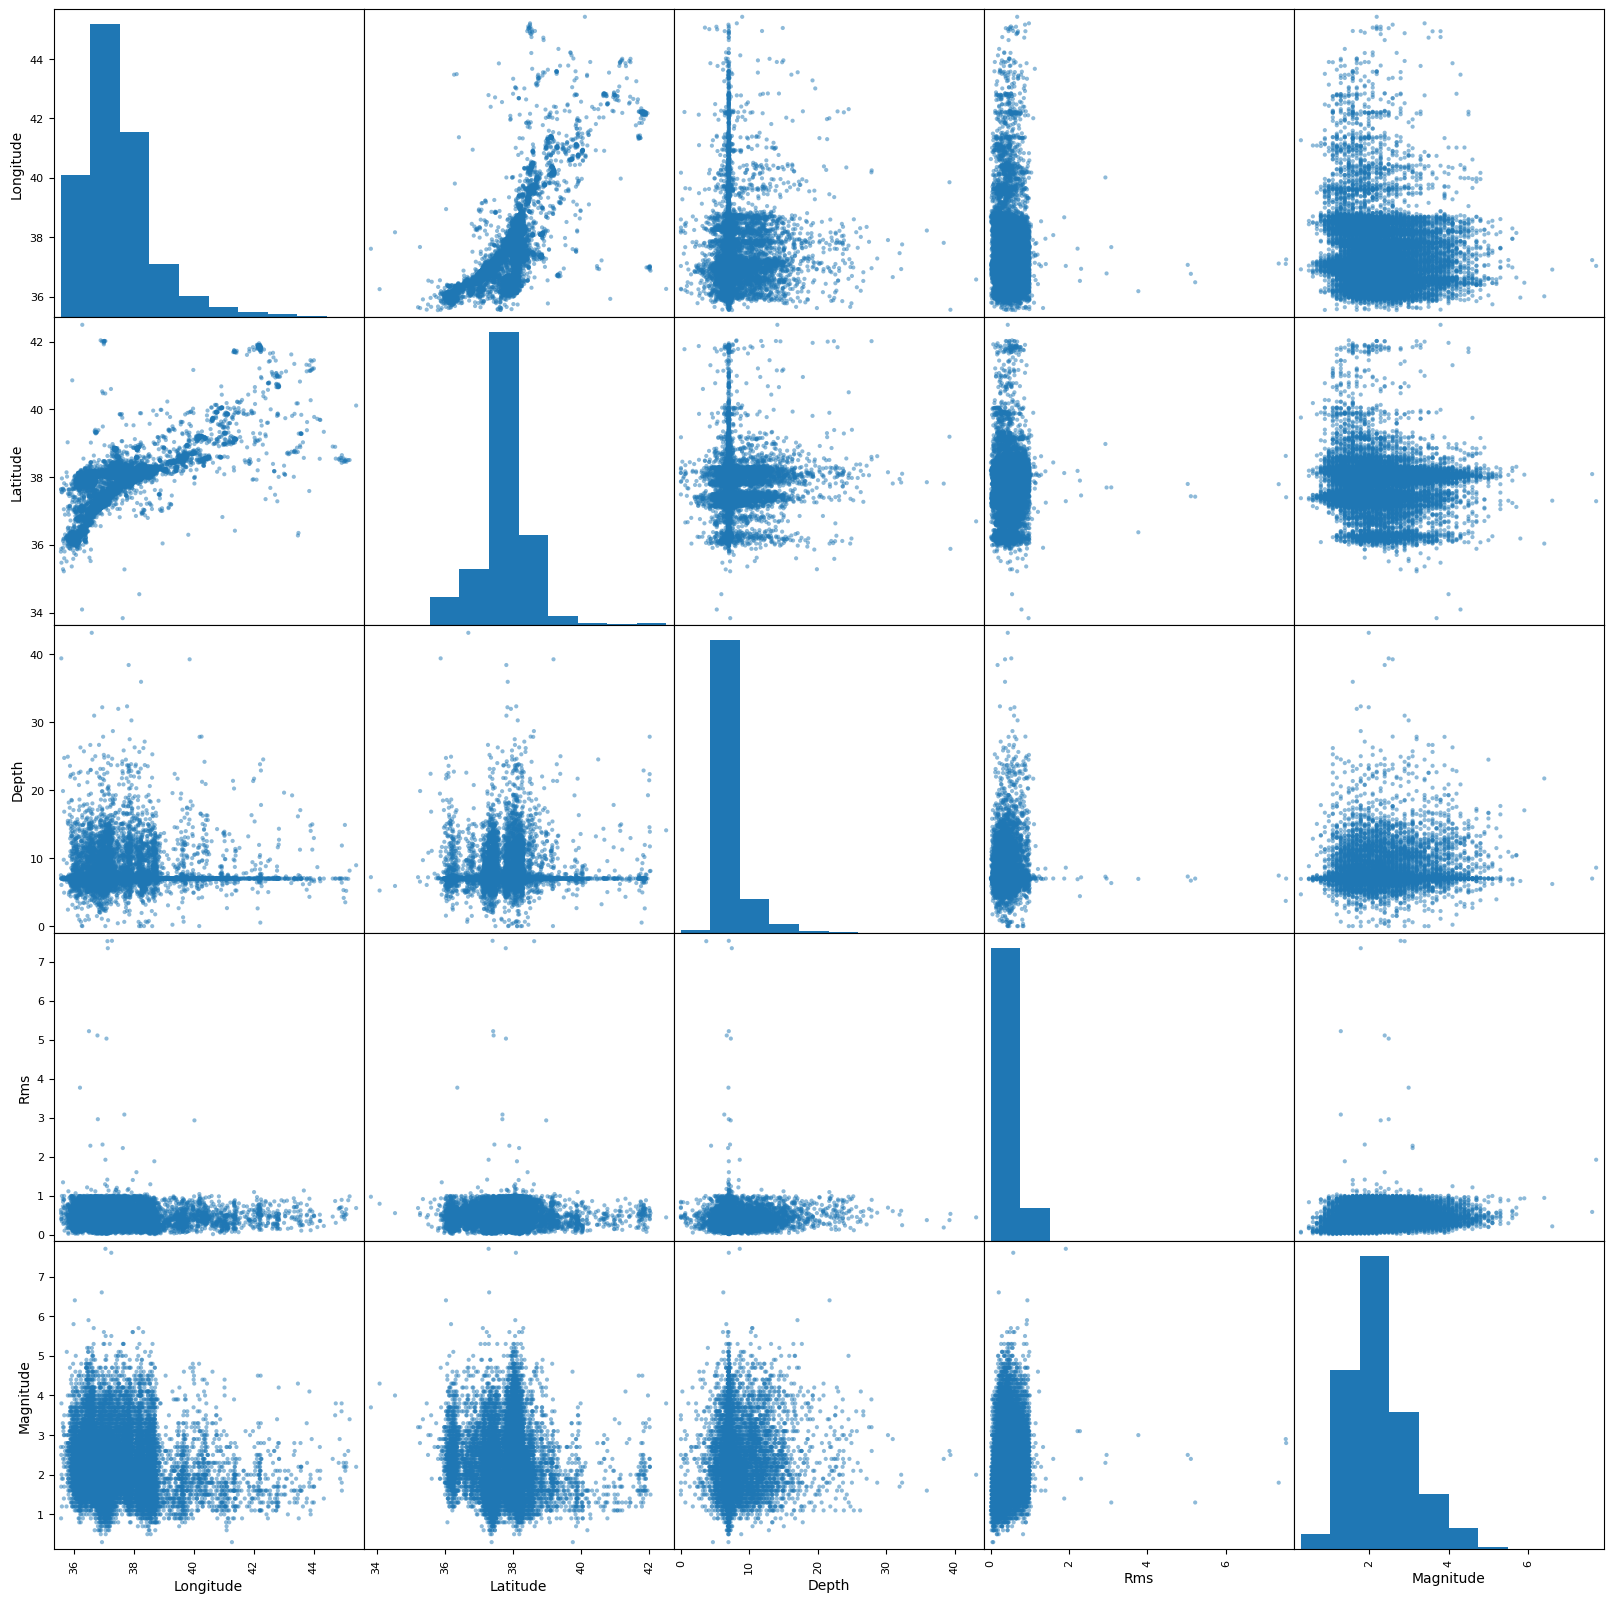

In [ ]:
import pandas

# Убираем пропущенные данные
df = pandas.read_csv('Earthquakes.csv')
df.drop(['Unnamed: 0', 'Date', 'Type', 'Location', 'EventID'], inplace=True, axis=1)

pandas.plotting.scatter_matrix(df, grid=True, figsize=(20, 20))